In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
rent_data = pd.read_csv("apartments_for_rent_classified_100K.csv", sep=";", encoding="latin1", low_memory=False)

In [12]:
pd.set_option('display.max_columns', None)  # Display all columns
rent_data.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,Cats,2195.0,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,"Cats,Dogs",1250.0,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,NaN,1395.0,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,"Cats,Dogs",1600.0,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",975.0,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [42]:

rent_data.isnull().sum()

id                   0
category             0
title                0
body                 0
amenities        16044
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     60424
price                1
price_display        1
price_type           0
square_feet          0
address          91549
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64

In [15]:
rent_data.shape

(99492, 22)

# 1.	Are there any observable relationships between the size of the apartment and its rent? What is the relation between the number of bedrooms and the rent (1P) 

In [ ]:
# square_feet - price -  bedrooms.

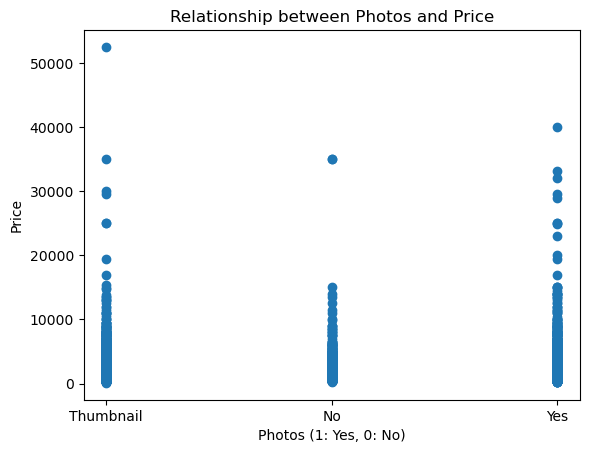

In [17]:
 #does having the photo of apartment online increase the price  of the that.

plt.scatter(rent_data['has_photo'], rent_data['price'])
plt.title('Relationship between Photos and Price')
plt.xlabel('Photos (1: Yes, 0: No)')
plt.ylabel('Price')
plt.show()


C:\Users\harpr\AppData\Local\Temp\ipykernel_6492\3110707406.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='photo_available', y='price', data=average_prices, palette='viridis')


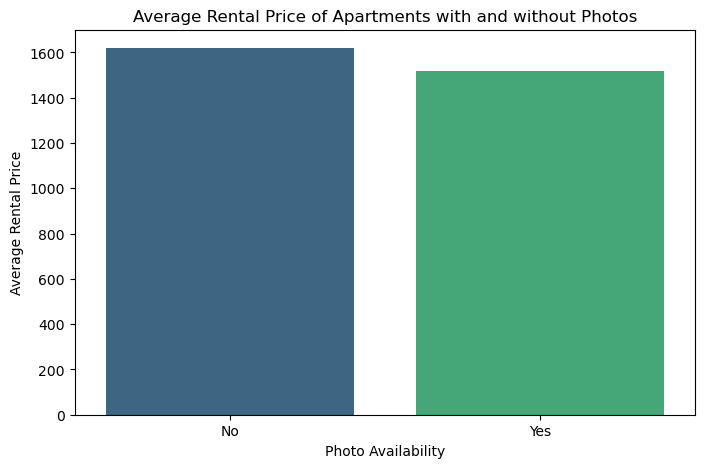

In [19]:
# Create a new column to consolidate photo availability
rent_data['photo_available'] = rent_data['has_photo'].apply(lambda x: 'Yes' if x in ['Yes', 'Thumbnail'] else 'No')

# Calculate the average rental price based on the new photo availability column
average_prices = rent_data.groupby('photo_available')['price'].mean().reset_index()

# Create a bar plot to visualize the average rental prices
plt.figure(figsize=(8, 5))
sns.barplot(x='photo_available', y='price', data=average_prices, palette='viridis')
plt.title('Average Rental Price of Apartments with and without Photos')
plt.xlabel('Photo Availability')
plt.ylabel('Average Rental Price')
plt.show()


In [21]:

# Separate the data into two groups based on photo availability
with_photo = rent_data[rent_data['photo_available'] == 'Yes']['price']
without_photo = rent_data[rent_data['photo_available'] == 'No']['price']



In [25]:
from scipy.stats import ttest_ind

# Perform the t-test
t_stat, p_value = ttest_ind(with_photo, without_photo, alternative='greater')

# Display results
print(f"Mean Rent (With Photos): {with_photo.avg():.2f}")
print(f"Mean Rent (Without Photos): {without_photo.mean():.2f}")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")


AttributeError: 'Series' object has no attribute 'avg'